<center>
    <img src="./images/mlfasp.png">
</center>

#### Prof. Dr. -Ing. Gerald Schuller <br> Jupyter Notebook: Renato Profeta

[Applied Media Systems Group](https://www.tu-ilmenau.de/en/applied-media-systems-group/) <br>
[Technische Universität Ilmenau](https://www.tu-ilmenau.de/)

# Recurrent Neural Networks

In [1]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/hOdzeTOEG6g?rel=0" frameborder="0" allow="accelerometer; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

So far we saw networks that process the input in layers towards the output, but with no feedback path. 

Recurrent Neural Networks (RNN), compute an internal "state" from the input, which then becomes part of the input in the next time-step. This makes it similar to Infinite Impulse Response (IIR) linear filters, which have a feedback path via delay elements from their output back to their input, as depicted in the following picture:


<center>
    <br>
 <img src="./images/iir_filter.jpg" width="700" />
    <br>
 </center>
 
This is a generic IIR filter (from: Lecture "Advanced Digital Signal Processing", slides 7, https://www.tu-ilmenau.de/mt/lehrveranstaltungen/lehre-fuer-master-mt/adsp-digital-signal-procesing-2, or: Alan V. Oppenheim, Ronald W. Schafer, with John R. Buck: "Discrete-Time Signal Processing" ).

In [1]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/82aPiJ4gegM?rel=0" frameborder="0" allow="accelerometer; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

We first analyse this structure, and then we will try to implement it with a **Recurrent Neural Network.**

The coefficients $b_i$ are the feed-forward coefficients, the $a_i$ are the feed-back coefficients. x[n] is the(audio) input signal, y[n] is the output signal of the filter. 

Because of the feedback path the IIR filter can start to oscillate and even become unstable.

This happens if the poles of its transfer function in the z-domain are outside the unit-circle. But if the poles are just inside the unit circle, and close to it, this filter produces an impulse response of decaying oscillations or sinusoidal signals. 

As an audio signal, this can sound like a tone from a bell. In this way it can be used to generate a signal.

The corresponding difference equation in the time domain is:

$$\large
\begin{equation}
y[n]= \sum _{m=0} ^L b[m] \cdot x[n-m]+ \sum _ {r=1} ^R a[r] \cdot y(n-r)
\end{equation}$$    

(See also: Oppenheim, Schafer: “Discrete Time Signal Processing”, Chapter 6 in Ed. 1989)

The resulting transfer function in the z-domain is (see also the lecture above):

$$ \large
H(z)=\dfrac{Y(z)}  {X(z)}= \dfrac{\sum _ {m=0} ^L b(m)  \cdot z^{-m}}{1-\sum _ {r=1} ^ R a(r) \cdot z^{-r}}
$$

For our test generative example we would like to have a decaying sinusoidal function as impulse response. 

We get this from a simple $2^{nd}$ order IIR filter, with $b_0=1$ (and 0 else, L=1), and R=2, meaning just 2 feedback delays and coefficients.

$$\large
\begin{equation}
y[n]= x[n] + \sum _{r=1}^2 a[r] \cdot y[n-r]
\end{equation}$$

and results in the transfer function in the z-domain:

$$ \large
H(z)=\dfrac{1}  {1-a_1\cdot z^{-1}-a_2\cdot z^{-2}}
$$

The denominator polynomial is of order 2, and hence has 2 zeros, which result in 2 poles, $p_0$, $p_1$ , of the transfer function H(z).

Each pole causes an oscillation at a frequency which is given by its angle to the real axis, in radians (where $\pi$ is 180 degrees), interpreted as normalized frequency (where $2\pi$ corresponds to the sampling frequency). If we want a real valued oscillation, we need a **conjugate complex pole pair.**

In [2]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/XtxmlCao7Uw?rel=0" frameborder="0" allow="accelerometer; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### **Example:** 
We want a decaying oscillation as an impulse response, with a frequency of 440 Hz (which is musical pitch A), at a sampling frequency of 8000 samples per second, and a decay factor of Q=0.995 per sample. The normalized frequency is then:

$$\large
\Omega=\dfrac{2\pi\cdot 440 Hz}{8000 Hz}$$

Then the conjugate complex pole pair is:

$$\large
p_{0,1}=Q \cdot \exp\left(\pm j \cdot Q\right)$$

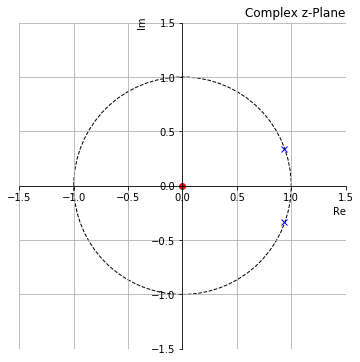

In [5]:
import numpy as np
import matplotlib.pyplot as plt
Q=0.995
Omega= 2*np.pi*440/8000
p0 = Q*np.exp(1j*Omega)
p1 = Q*np.exp(-1j*Omega)
# Plot Poles and Zeros
from  matplotlib import patches
plt.figure(figsize=(8,6))
ax = plt.subplot(111)
r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
#ticks = [-1, 1]; plt.xticks(ticks); plt.yticks(ticks)
# Unit Circle
uc = patches.Circle((0,0), radius=1, fill=False, color='black', ls='dashed')
ax.add_patch(uc)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Re', horizontalalignment='right', x=1.0)
plt.ylabel('Im',  y=1.0)
plt.title('Complex z-Plane', loc='right')
plt.grid()
plt.plot(0,0,'ro')
plt.plot(np.real(p0),np.imag(p0),'bx')
plt.plot(np.real(p1),np.imag(p1),'bx')

With these poles, the transfer function becomes:

$$ \large
H(z)=\dfrac{1}  {1-a_1\cdot z^{-1}-a_2\cdot z^{-2}} =\dfrac{1}  {(1-p_0\cdot z^{-1})(1-p_1\cdot z^{-1})} 
$$

which means:

$$\large
a_1=(p_0+p_1) \\
\large
a_2=p_0\cdot p_1$$

using the above pole pair (and with Eulers formula $e^{j\cdot \Omega}=\cos (\omega)+ j\cdot \sin(\Omega)$ ) this becomes:

$$\large
a_1=2Q\cdot \cos(\Omega)\\
\large
a_2=-Q^2$$

### Python Implementation

In Python we first create an impulse, meaning a one (or 0.1 to keep the signal smaller), followed by as many zeros as we would like to produce the impulse response. Then we use `scipy.signal.lfilter` to generate the impulse response. 

There we need to observe that `lfilter` expects the "a" coefficients (here "k" coefficients) with opposite sign.

In [3]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/mzQ5Q_EQgJ0?rel=0" frameborder="0" allow="accelerometer; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [21]:
from scipy import signal as sig
Fs=8000
seq_len=Fs*2
omega=2*np.pi*440.0 /Fs
k1=2*Q*np.cos(omega)
k2=-pow(Q,2);
ximp=np.zeros(seq_len) #make impulse with a desired sequence length
ximp[0]=0.1 #impulse at the beginning
filtered=sig.lfilter([1], np.array([1, -k1,-k2]), ximp)

It then plays back the resulting impulse response to the audio output:

In [23]:
import IPython.display as ipd
ipd.Audio(filtered, rate=Fs)

Observe that it indeed sounds like a small bell or a Xylophone.

## Implementation using a Recurrent Neural Network (RNN)

In [4]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/d2cfkY4QC0Y?rel=0" frameborder="0" allow="accelerometer; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In IIR filters we have the delay chain of delay elements $z^{−1}$ , which delay each sample by one sample interval. 

In an RNN instead we have the "hidden states" *h*, which is a vector or array which is updated after each sample interval according  to the matrix equation:

$$\large
h_t=tanh(W_{ih}\cdot  x_t+b_{ih}+W_{hh}\cdot h_{t−1}+b_{hh})$$

where $x_t$ is our input signal (here the impulse), and *t* is our integer valued time index (which was *n* for the IIR filter). The *W* are weight matrices, and the *b* are the biases, which we don't need here.

Observe that *x* and *h* are column vectors or arrays.

Also, there is always a non-linearity. Default is the `tanh function`, an alternative is the `relu` function.

In [25]:
%%html
<iframe width="900" height="400" src="https://pytorch.org/docs/stable/generated/torch.nn.RNN.html#torch.nn.RNN"></iframe>

Since our IIR filter does not have a non-linearity, we choose the *tanh* function and keep the signal small,  such that it stays in its more linear region.

The hidden state *h* also represents the output of the RNN.

To make it function like our *IIR filter*, we use the hidden states as the delay line in our IIR filter, which means the hidden states are equal to the filter output and its two delayed versions:

$$\large
h_t[i]=y[t−i] \text{ for i=0,1,2}$$

hence i=0 denotes the most recent sample.

Observe the notation $h_t[i]$: this is an array or (column) vector with 3 entries, indexed with *i* , at time *t* .

From the time domain difference eq. (2) we know that:

$$\large
h_t[0]=y[t]=x[t]+a_1 \cdot y[t−1] + a_2 \cdot y[t−2]$$

which equals:

$$\large
h_t[0]=x[t]+a_1 \cdot h_{t−1} [0]+a_2 \cdot h_{t−1} [1] $$

Then we just need to shift the remaining hidden states by one time step down such that they become the delay line:

$$\large
h_t[1]=h_{t−1}[0] \\
\large
h_t [2]=h_{t−1}[1] $$

These equations now give us the necessary weight matrices $W_{hh}$ and $W_{ih}$ , in our simplified RNN update equation:

$$\large
h_t=W_{ih} \cdot x_t+W_{hh} \cdot h_{t−1}$$

where we neglected the non-linear activation function and set the biases to zero.

We get:

$$\large
W_{hh}=
\begin{bmatrix}
a_1 & a_2 & 0\\
1 & 0 & 0 \\
0 & 1 & 0
\end{bmatrix}$$

We set $x_t$ as the single sample x[t] (instead of a column vector, since we don't need past *x* values because we chose no FIR part with L=0 in eq. (1)), hence $W_{ih}$ just becomes a column weight vector which has a 1 in the position for $h_t[0]$:

$$\large
W_{ih}=
\begin{bmatrix}
 1\\
0 \\
0
\end{bmatrix}$$

This is now our RNN working as our IIR filter!

The output of our RNN IIR filter is $h_t[0]$ , which we obtain by adding a linear output layer, which has a factor of 1 for this element, and zeros for the other elements.

### Python Pytorch Implementation

We use Pytorch to implement a Recurrent Neural Network (RNN) as a class:

In [5]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/AIshvG00PMI?rel=0" frameborder="0" allow="accelerometer; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [23]:
import torch
import torch.nn as nn
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("device=", device)  

infeatures= 1 # samples per input time step
hiddensize= 3 #number of hidden states, the memory elements
outputs=1 #1 samples per output time step
numlayers=1 #number of layers of the network
batch=1

device= cpu


In [24]:
class RNNnet(nn.Module):
    def __init__(self, infeatures, hiddensize, outputs):
        super(RNNnet, self).__init__()
        # Define the model.
        self.rnn = nn.RNN(input_size=infeatures, hidden_size=hiddensize, num_layers=numlayers, bias=False)
        #forward layer for output
        self.fo = nn.Linear(hiddensize, outputs, bias=False)
        
    def forward(self, x):
        h_0 = torch.zeros(numlayers, batch, hiddensize).to(device)
        out, hn = self.rnn(x, h_0)
        #Output is simply the hidden state of the last layer (if more than 1 layer)
        out = self.fo(out) #e.g. used to just keep first output
        return out

To convert our audio signal to the Pytorch format for the RNN, we define the function:

In [25]:
def signal2pytorch(x):
    #Function to convert a signal vector x, like a mono audio signal, into a 3-d Tensor that Pytorch expects,
    #https://pytorch.org/docs/stable/nn.html
    #Argument x: a 1-d signal as numpy array
    #output: 3-d Pytorch Tensor.
    #for RNN Input: (siglen,batch,features)
    X = np.expand_dims(x, axis=-1) #add batch dimension (here only 1 )
    X = np.expand_dims(X, axis=-1) #add features dimension (here only 1 )
    X=torch.from_numpy(X)
    X=X.type(torch.Tensor)
    return X

Next we compute the coefficients for our IIR filter:

In [26]:
import numpy as np
Fs=8000
omega=2*np.pi*440.0 /Fs; #normalized frequency
Q=0.995 #determines speed of decay, the closer to 1 the longer
k1=2*Q*np.cos(omega)
k2=-pow(Q,2);

Then we compute its impulse response and play it to the speaker:

In [27]:
from scipy import signal as sig
import IPython.display as ipd
seq_len=Fs*2
ximp=np.zeros(seq_len) #make impulse with a desired sequence length
ximp[0]=0.1 #impulse at the beginning
filtered=sig.lfilter([1], np.array([1, -k1,-k2]), ximp)
print("The impulse response sound from the I.I.R. filter")
display(ipd.Audio(filtered, rate= Fs))

The impulse response sound from the I.I.R. filter


In [51]:
"""
RNN as IIR Filter: hidden states h as delay chain 
Weights for updating h for shifting the delay line:
s=array([[0,0,0],[1,0,0],[0,1,0]]) 
In [4]: s      
array([[0, 0, 0],
       [1, 0, 0],
       [0, 1, 0]])

Application of IIR coefficients a(1)=2, a(2)=3:
a=array([[1,2,3],[0,1,0],[0,0,1]])                                      

In [2]: a 
Out[2]: 
array([[1, 2, 3],
       [0, 1, 0],
       [0, 0, 1]])
First apply shift operator s and then coefficents, h multiplied from right:
dot(a,s)
array([[2, 3, 0],
       [1, 0, 0],
       [0, 1, 0]])
this is w_hh.
""";

Now we can create our neural network model and assign our desired weights, such that it acts like the IIR filter:

In [52]:
rnn = RNNnet(infeatures, hiddensize, outputs)
#Shifted diagonal matrix and IIR Filter coefficients:
rnn.state_dict()['rnn.weight_hh_l0'].data.copy_(torch.diag(torch.ones(hiddensize-1),diagonal=-1))
rnn.state_dict()['rnn.weight_hh_l0'][0,:].data.copy_(torch.tensor([ k1, k2,0.0]))
#Vector with a "1" for input x:
rnn.state_dict()['rnn.weight_ih_l0'].data.copy_(torch.zeros((hiddensize,1)))
rnn.state_dict()['rnn.weight_ih_l0'][0,0].data.copy_(torch.tensor(1.0))
#Weight for linear output layer to select h[0]:
rnn.state_dict()['fo.weight'][0,:].data.copy_(torch.tensor([1.0,0.0 ,0.0]))
ww = rnn.state_dict() #read obtained weights
print("weights =", ww)

weights = OrderedDict([('rnn.weight_ih_l0', tensor([[1.],
        [0.],
        [0.]])), ('rnn.weight_hh_l0', tensor([[ 1.8724, -0.9900,  0.0000],
        [ 1.0000,  0.0000,  0.0000],
        [ 0.0000,  1.0000,  0.0000]])), ('fo.weight', tensor([[1., 0., 0.]]))])


With this print function you should check at runtime if the weights of the model now look like you would expect. If they look okay we have now a functional neural network which should work similar to an IIR filter. We try it by converting our impulse input to Pytorch, and then feed it to our neural network:

In [53]:
#the input, converted from the Numpy array:
inputsig=signal2pytorch(ximp)
#Run Recurrent Neural Network:
outsig= rnn(inputsig)

The output of the RNN is then converted back to numpy, played back to the speaker for listening comparison, and ploted together with the output of the IIR filter for visual comparison:

In [54]:
outsig=outsig.detach()
outsig=np.array(outsig) #turn into numpy array
outsig=outsig[:,0,0]
print("The sound from the recurrent neural network")
display(ipd.Audio(outsig, rate=Fs))

The sound from the recurrent neural network


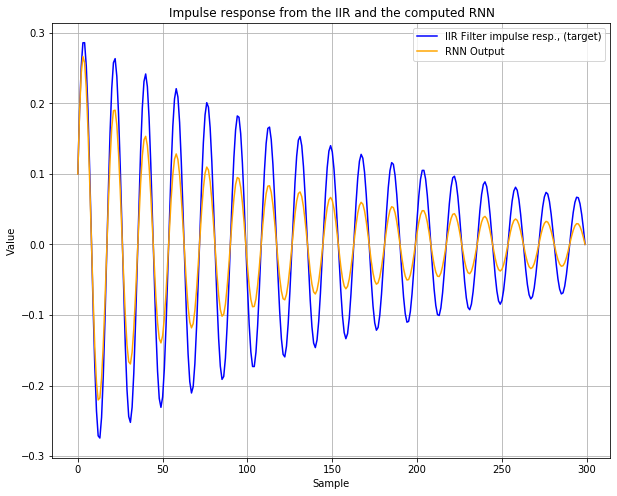

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(filtered[:300], 'blue')
plt.plot(outsig[:300],'orange')
plt.legend(('IIR Filter impulse resp., (target)','RNN Output'))
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title("Impulse response from the IIR and the computed RNN")
plt.grid()

The resulting plot below shows that the output from the RNN is somewhat smaller, because of the `tanh` function.

This shows that an RNN can be indeed be setup to function like an IIR filter. This creates a connection to IIR filters, and hence RNN can be viewed as their generalization.

## Training the RNN

In [6]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/n56VbAU-uog?rel=0" frameborder="0" allow="accelerometer; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Now we know that there is a solution for the weights that make the RNN behave similar to an IIR filter. In general we will not pre-compute the weights, but let the optimization figure it out on its own, given the impulse as training input desired impulse response as target signal.

If the optimization is powerful enough it should be able to find this solution. The problem here is that for a system with feedback, as the RNN, the gradient of the loss function for the optimization is difficult to compute.

Pytorch uses "Autograd" to compute the gradients of the loss function, see:

In [56]:
%%html
<iframe width="900" height="400" src="https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html"></iframe>

In [57]:
%%html
<iframe width="900" height="400" src="http://seba1511.net/tutorials/beginner/blitz/autograd_tutorial.html"></iframe>

https://towardsdatascience.com/pytorch-autograd-understanding-the-heart-of-pytorchs-magic-2686cd94ec95

The weights are of *type* `torch.tensor`, and the have the attribute `requires_grad=True.`

Pytorch then tracks all operations with them to be able to quickly do the gradient calculation using back-propagation (which is basically just another name of the chain-rule of differentiation). This is done with the `.backward()` step in the optimization
loop. The resulting gradient is then stored in the `.grad` attribute.

When we have a feed back loop, as in recurrent neural networks, we apply the network over and over again to its output. This can be seen as a very deep neural network, where each loop iteration is another layer with the same coefficients. 

Applying *back-propagation* means that we go back through all those layers or iterations, using the chain rule for the computation of the gradient. But each computation introduces computation errors, which then accumulate. 

If our impulse response signal decays very slowly, then we have significant components far back in history, which makes the computation of the gradient very inaccurate. 

This can also lead to the problem of vanishing gradients, where very small values are rounded to zero, or exploding gradients, which leads to "Not a Number" (NaN) errors.

Our example has an impulse response with significant values over several thousand samples, at Q=0.995, and it sill converges. 

But if we make it a little longer by increasing Q to Q=0.9995, then the optimization is no longer converging because of this problem.

See also:

In [58]:
%%html
<iframe width="900" height="400" src="http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns/"></iframe>

Approaches to solve this problem are the "Gated Recurrent Networks" (GRU):

In [59]:
%%html
<iframe width="900" height="400" src="https://pytorch.org/docs/master/generated/torch.nn.GRU.html?highlight=gru#torch.nn.GRU"></iframe>

and the “Long Short Term Memory” network (LSTM), which have learn-able bypass connections ("gates"), which make the computation of the gradient more precise. 

But for problems where the simple RNN converges, it seems to converge faster, also because GRU and LSTM have many more weights to be optimized.

In [60]:
%%html
<iframe width="900" height="400" src="https://pytorch.org/docs/master/generated/torch.nn.LSTM.html?highlight=lstm#torch.nn.LSTM"></iframe>

To continue with our Python program, it re-initializes the RNN, with random starting values, prints the total number of parameters (weights and biases), and then starts the optimization with 500 epochs:

In [61]:
#input is the pulse, with the 0.1 in the beginning, target is the output of the IIR filter:
target= signal2pytorch(filtered)
print("target.type()=", target.type())
print("target=", target)

target.type()= torch.FloatTensor
target= tensor([[[ 1.0000e-01]],

        [[ 1.8724e-01]],

        [[ 2.5157e-01]],

        ...,

        [[-2.8209e-36]],

        [[-1.4916e-36]],

        [[ 0.0000e+00]]])


In [65]:
#random starting point as initialization:
rnn.state_dict()['rnn.weight_hh_l0'].data.copy_(torch.randn(hiddensize,hiddensize))
#rnn.state_dict()['rnn.weight_hh_l0'].data.copy_(torch.zeros(hiddensize,hiddensize))
rnn.state_dict()['rnn.weight_ih_l0'].data.copy_(torch.randn((hiddensize,1)))
#rnn.state_dict()['rnn.weight_ih_l0'].data.copy_(torch.zeros((hiddensize,1)))
#rnn.state_dict()['fo.weight'][0,:].data.copy_(torch.tensor([ 1.0, 0.0 ,0.0]))
#rnn.state_dict()['fo.weight'][0,:].data.copy_(torch.zeros(hiddensize))
rnn.state_dict()['fo.weight'][0,:].data.copy_(torch.randn(hiddensize))

tensor([-1.5327,  0.9342,  0.5778])

In [66]:
rnn = RNNnet(infeatures, hiddensize, outputs).to(device)
ww = rnn.state_dict() #read current weights
print("weights =", ww)
print('Total number of parameters: %i' % (sum(p.numel() for p
in rnn.parameters() if p.requires_grad)))
loss_fn = nn.MSELoss(reduction='sum')
#learning_rate = 1e-3
optimizer = torch.optim.Adam(rnn.parameters())
for epoch in range(500):
    Ypred=rnn(inputsig)
    loss=loss_fn(Ypred, target)
    if epoch%10==0:
        print(epoch, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

weights = OrderedDict([('rnn.weight_ih_l0', tensor([[0.4665],
        [0.5345],
        [0.3283]])), ('rnn.weight_hh_l0', tensor([[ 0.0414,  0.4271, -0.4895],
        [-0.0175, -0.0723,  0.4523],
        [-0.4473, -0.3634, -0.4696]])), ('fo.weight', tensor([[-0.1503,  0.4366, -0.4715]]))])
Total number of parameters: 15
0 4.388274669647217
10 4.387454032897949
20 4.386641025543213
30 4.385805130004883
40 4.384890079498291
50 4.383843421936035
60 4.3826165199279785
70 4.381145477294922
80 4.379334449768066
90 4.377028465270996
100 4.373979568481445
110 4.36981201171875
120 4.363988399505615
130 4.355762481689453
140 4.344211101531982
150 4.328616619110107
160 4.309744834899902
170 4.2918620109558105
180 4.279848098754883
190 4.268871307373047
200 4.256827354431152
210 4.2448225021362305
220 4.232172012329102
230 4.218789100646973
240 4.204394340515137
250 4.188652992248535
260 4.170994758605957
270 4.150516510009766
280 4.12559700012207
290 4.093055248260498
300 4.04579496383667
310 3.9

The loss usually starts at around 4.4, and ends at around 0.1, which looks successful. 

The program then plots the resulting impulse response from the RNN in comparison with the given audio target, which is the impulse response of the IIR filter:

In [68]:
#the input, converted from the Numpy array:
inputsig=signal2pytorch(ximp)
#Run Recurrent Neural Network:
outsig= rnn(inputsig)

In [69]:
outsig=outsig.detach()
outsig=np.array(outsig) #turn into numpy array
outsig=outsig[:,0,0]
print("The sound from the recurrent neural network")
display(ipd.Audio(outsig, rate=Fs))

The sound from the recurrent neural network


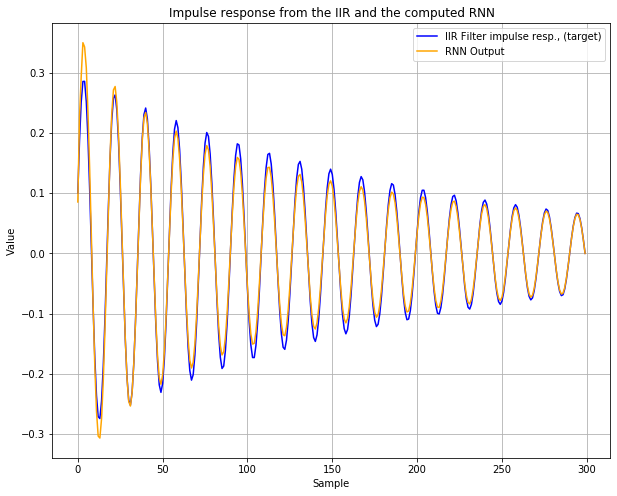

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(filtered[:300], 'blue')
plt.plot(outsig[:300],'orange')
plt.legend(('IIR Filter impulse resp., (target)','RNN Output'))
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title("Impulse response from the IIR and the computed RNN")
plt.grid()

Observe that we now have an even better fit than with our pre-computed weights. This is because the training was able to partly compensate the effects of the non-linear activation function (the tanh).

This approach can now be used to **generate sound**, and also to **detect sound**. For instance this RNN could be used to generate Xylophone or bell sounds.

Each impulse at its input is like an attack for a certain note of the Xylophone or bell. Different targets in the training result in different sounds.

Observe that this is now more generic than an IIR filter, and hence more sounds could be produced.

Matched filter theory states that a filter is maximizing the Signal to Noise Ratio for a signal which is the time-reversed of its impulse response (see our slide set on convolutional neural networks). Since RNNs have long impulse responses, they can hence **detect long signals or sequences.**

In [71]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/r3KF3-H61QQ?rel=0" frameborder="0" allow="accelerometer; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>